# SWMAL Exercise

## Learning Curves

### The Generalization Error, Over- and Underfitting, Early Stopping, and Optimal Capacity

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), which pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) The Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

In Figure 5.3 there is two types of errors with Capacity and Error on the x- and y axis. Training and generalization error is the error compared to the dataset. the figure shows that in the underfit zone both errors are high because the model is not trained enought to find a better solution. as the capacity rises and it finds better solutions the training error improvement will slow down and at some point the genralization error will start to increase. that is the overfitting zone. the capacity is so high that the model is very good at training data but not very good at the generalization data. The distance betweenthen is called the generalization gab and the goal is to find the optimal capacity where the error is lowest and the generalisation gap is also low. 

### Qb Learning Curves

Next, produce a loss vs epoch graph ala (from `04_training_linear_models.ipynb` [GITHOML]) 

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/training_curve.png" alt="WARNING: could not get image from server.">


for your linear regressor, `MyLinReg`, from an earlier lesson. You need a function 

>```LossHistory()```

on your regressor class, that accumulates the internally calculated $J$'s. Once `LossHistory` is ready, plot it using the code below.

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split 


class MyLinReg():
    def __init__(self, eta0=0.01, max_iter=10, n_iter_no_change=5, verbose=True):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.n_iter_no_change = n_iter_no_change
        self.verbose = verbose
        self.loss_hist = []
        self.loss_hist_validate = []

    def __str__(self):
        return "MyLinReg.__str__(): hi!"
    
    def batch_gradient_decent(self): 
        # Compute predictions for all samples
        Y_pred = self.predict(self.X)
        
        # Compute batch gradients
        dW = self.X.T.dot(Y_pred - self.Y) / self.m  # Mean gradient for weights
        db = np.mean(Y_pred - self.Y)  # Mean gradient for bias

        # Update weights using full dataset gradients
        self.W = self.W - self.eta0 * dW
        self.b = self.b - self.eta0 * db
        
        return self
    
    def stocastic_gradient_decent(self):
        # Pick one random sample (stochastic)
        i = np.random.randint(0, self.m)  # Random index
        X_i = self.X[i].reshape(1, -1)  # Make it a row vector
        Y_i = self.Y[i]  # Corresponding target

        # Compute prediction
        Y_pred = self.predict(X_i)

        # Compute gradient (SGD formula)
        dW = X_i.T.dot(Y_pred - Y_i)  # Gradient for weights
        db = Y_pred - Y_i

        # Update weights
        self.W = self.W - self.eta0 * dW
        self.b = self.b - self.eta0 * db

    def fit(self, X, y):
        self.X, X_val, self.Y, Y_val = train_test_split(X, y, test_size=1/3, random_state=42)

        self.m, self.n = X.shape
         # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        best_loss = 0.0
        no_change_count = 0
                    
        # gradient descent learning                  
        for i in range(self.max_iter):
            Y_pred = self.predict(self.X)
            loss = np.mean((self.Y - Y_pred) ** 2)  # Mean Squared Error (MSE)
            
            self.loss_hist.append(loss)

            Y_pred_val = self.predict(X_val)
            loss_val = np.mean((Y_val - Y_pred_val) ** 2)  # Mean Squared Error (MSE)
            
            self.loss_hist_validate.append(loss_val)

            if self.verbose:
                print(f"Iteration {i+1}, Loss: {loss}, Loss Validation: {loss_val}")

            # Check for convergence
             # Check for convergence based on validation loss
            if loss_val > (best_loss):
                best_loss = loss_val  # Update best loss
                no_change_count = 0  # Reset count if validation loss decreases
            else:
                no_change_count += 1
                if no_change_count >= self.n_iter_no_change:
                    if self.verbose:
                        print(f"Stopping early at iteration {i+1} due to no improvement on validation set.")
                    break

            best_loss = loss

            self.batch_gradient_decent()               
        
        return self
    
    def predict(self, X):
        return X @ self.W.reshape(-1, 1) + self.b  # Ensure proper matrix multiplication

    def score(self, X, y_true):
        """Compute R^2 (coefficient of determination) score."""
        y_pred = self.predict(X)  # Ensure predictions are 1D

        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
        ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
        
        r2_score = 1 - (ss_residual / ss_total)  # Compute R^2
        return r2_score
    
    def LossHistory(self):
        return self.loss_hist, self.loss_hist_validate

Iteration 1, Loss: 4700002131.044209, Loss Validation: 8304271664.019821
Iteration 2, Loss: 1550799087.139949, Loss Validation: 2007556369.1103327
Iteration 3, Loss: 613602650.6114272, Loss Validation: 457051278.3829224
Iteration 4, Loss: 334275212.9575123, Loss Validation: 170702748.2902956
Iteration 5, Loss: 250605221.35931072, Loss Validation: 180128942.72262925
Iteration 6, Loss: 225127672.61585617, Loss Validation: 233891152.8694452
Iteration 7, Loss: 216959489.54128468, Loss Validation: 277103779.84554476
Iteration 8, Loss: 213941744.45697412, Loss Validation: 304267305.8050154
Iteration 9, Loss: 212458275.4173546, Loss Validation: 319635107.61932224
Iteration 10, Loss: 211433599.61040008, Loss Validation: 327676199.3774469
Iteration 11, Loss: 210547850.25423563, Loss Validation: 331462917.5791839
Iteration 12, Loss: 209705886.17576846, Loss Validation: 332857427.67264456
Iteration 13, Loss: 208879401.23572645, Loss Validation: 332929557.353754
Iteration 14, Loss: 208059966.55219

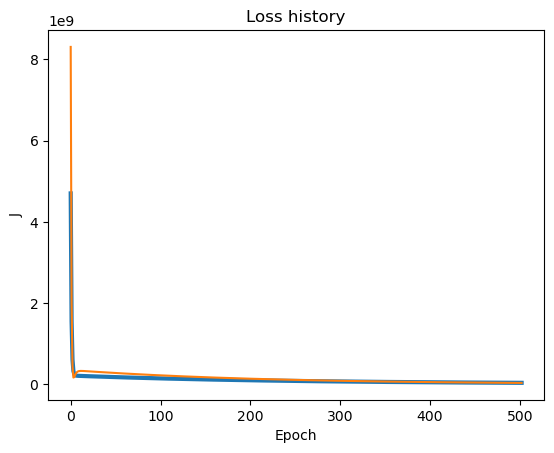

score_sklearn0.9353489045515235
score0.9353489045515235
OK


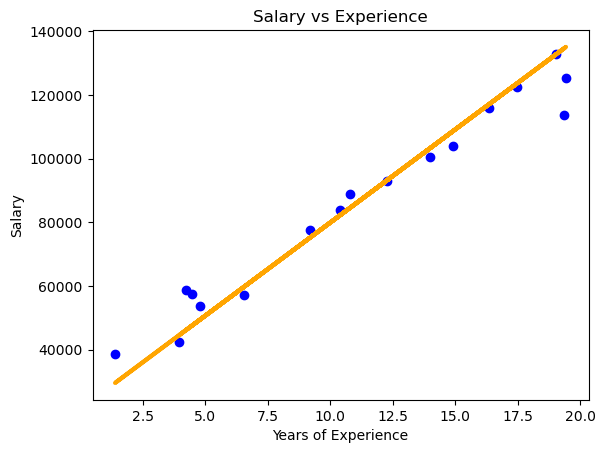

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 


# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 50  # Number of data points
X = np.random.uniform(1, 20, num_samples).reshape(-1, 1)  # Random years of experience between 1 and 20
true_W = 5000  # True weight (salary increase per year)
true_b = 30000  # True bias (base salary)
noise = np.random.normal(0, 5000, num_samples).reshape(-1, 1)  # Add Gaussian noise (stddev = 5000)
Y = true_W * X + true_b + noise  # Linear relationship with noise

# Convert to DataFrame and save to CSV (optional)
df = pd.DataFrame(np.hstack((X, Y)), columns=["YearsExperience", "Salary"])
df.to_csv("synthetic_salary_data.csv", index=False)  # Save dataset to CSV

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)


# Model training     
r = MyLinReg(max_iter=2000, n_iter_no_change=50, verbose=True) 
r.fit( X_train, Y_train ) 

loss_hist, loss_hist_validate = r.LossHistory()

# Plot of J vs. epoch (or perhaps iteration)...

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(loss_hist, label='Training Loss', linewidth=3)
plt.plot(loss_hist_validate, label='Validation Loss')

ax.set_title("Loss history")
ax.set_xlabel("Epoch")
ax.set_ylabel("J")

zoom_axis = False
if zoom_axis:
    limits_x = ax.get_xlim()
    limits_y = ax.get_ylim()
    ax.set_ylim([0, limits_y[1]/10]) # zoom on y axis
    
plt.show()

score = r.score(X_test,Y_test)
score_sklearn = r2_score(Y_test, r.predict(X_test))
print(f"score_sklearn{score_sklearn}")
print(f"score{score}")
print("OK")

Y_pred = r.predict(X_test)

# Visualization on test set     
plt.scatter( X_test, Y_test, color = 'blue' )    
plt.plot( X_test, Y_pred, color = 'orange', linewidth = 3 )   
plt.title( 'Salary vs Experience' ) 
plt.xlabel( 'Years of Experience' )   
plt.ylabel( 'Salary' ) 
plt.show() 

### Qc)  Early Stopping

Then implement ___early stopping___, in your `MyLinReg` estimator. Below is a graphical view of early stopping similar to Figure 4-20 p.162 [HOML] (for a non-linear model?)

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/early_stopping.png" alt="WARNING: could not get image from server.">

Write an explanation of the early stopping concept in text, implement it in your linear regressor and write some test/demo code, that via some learning-curve graphs demonstrates how it works when training your linear regressor in both _batch-gradient descent_ and 
_stochastic gradient descent_ modes.

In [49]:
assert False, "TODO: implement early stopping

SyntaxError: unterminated string literal (detected at line 1) (3604015922.py, line 1)

### Qd:  [OPTIONAL]  Using a Polynomial Regressor to Produce an Error-vs-Capacity Graph

Finally, create a polynomial estimator based on your `MyLinReg`, see details of
how to expend a linear regressor to a polynomial fitting in [HOLM] or in

> https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
 
that contains most of the code you will need. 
 
With a polynomial regressor, you should be able to reproduce a graph similar to Figure 5.3 from Deep Learning [DL], where you notice that the _x-axis_ is capacity and not _epoch_ as the learning curves you just produced in Qb/c.

In [ ]:
assert False "TODO: implement a polynomial-fit pipeline, and create an Error-vs-Capacity plot..

pipeline = Pipeline([
      ("polynomial_features", polynomial_features),
      ("linear_regression",   MyLinReg())
  ])


### Qe Conclusion

Sum it all up in a nice, well-written conclusion.

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added a comment on 90-degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot. 
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.
2024-09-25| CEF, major update, combined  generalization_error.ipynb and capacity_under_overfitting.ipynb, removed review parts, added graphs plots for MyLinReg.
2024-10-14| CEF, minor text updates.